In [1]:
import sys
import json
sys.path.append('..')
sys.path.append('../questions_construction')

from src.common import *
from model_performances import *
from copy import deepcopy

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
answer_type = TRUE_FALSE_ANSWER #FREE_ANSWER#
score_key = 'accuracy'
results_all = open_jsonl(os.path.join(STATISTICS_PATH, save_stats_file(answer_type, score_key)))

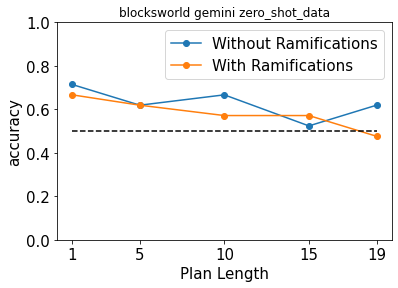

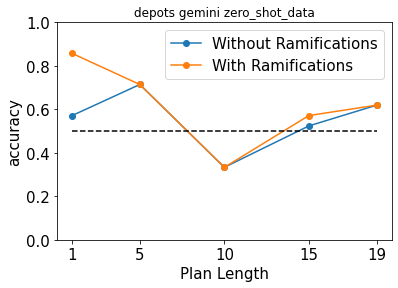

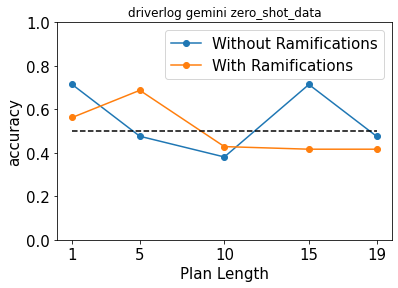

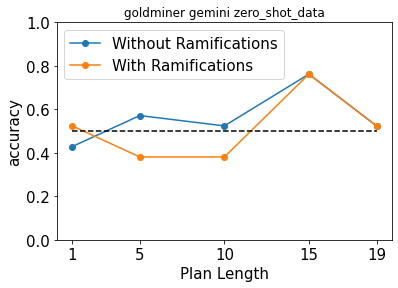

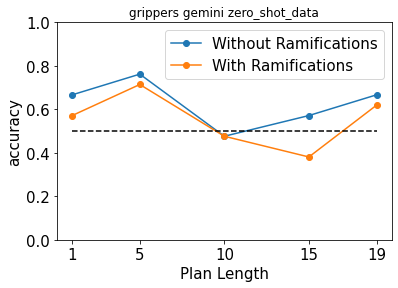

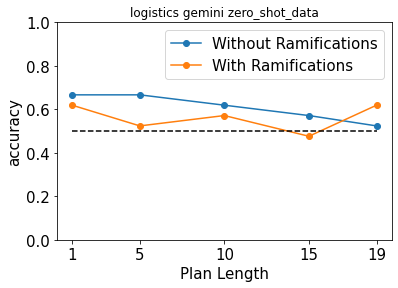

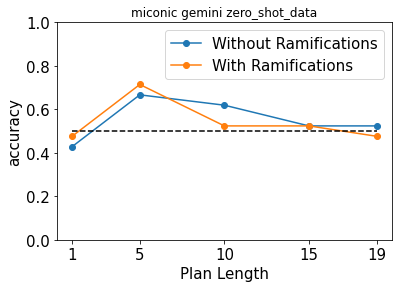

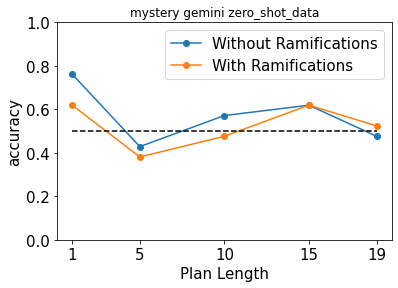

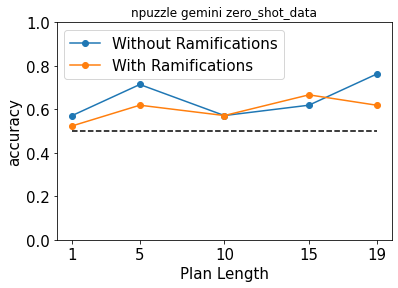

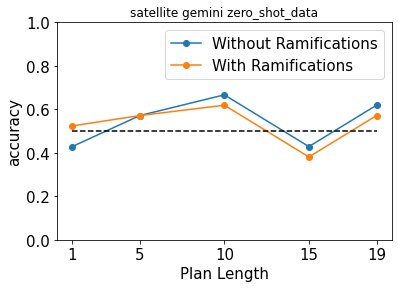

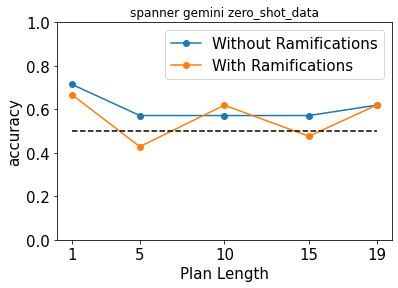

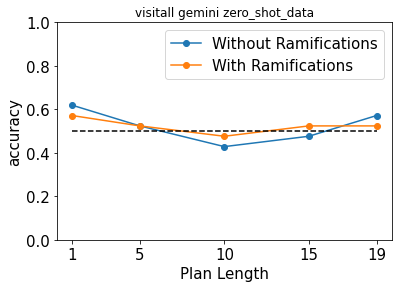

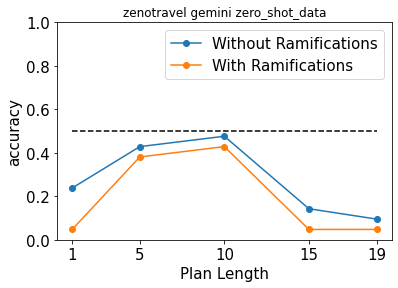

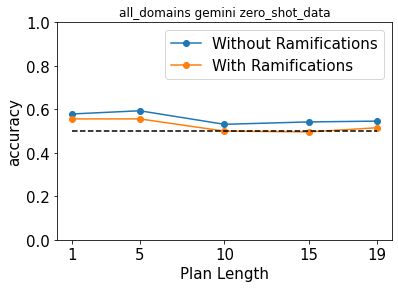

In [5]:
model_name = 'gemini'
prompt_type = 'zero_shot_data'#'few_shot_4_cot'
question_category = ALL_CATEGORIES_KEY

for domain in DOMAIN_NAMES + [ALL_DOMAINS_KEY]:
    results_by_ram = defaultdict(list)
    for ramifications in RAMIFICATION_TYPES:
        for plan_length in PLAN_LENGTHS:
            res = filter_single_selector(results_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type)
            assert len(res) == 1
            results_by_ram[ramifications].append(res[0][SK_RESULT])
            
    plt.figure()
    plt.plot(PLAN_LENGTHS, results_by_ram[WITHOUT_RAMIFICATIONS], 'o-', label='Without Ramifications')
    plt.plot(PLAN_LENGTHS, results_by_ram[WITH_RAMIFICATIONS], 'o-', label='With Ramifications')
    plt.plot(PLAN_LENGTHS, [0.5 for _ in range(len(PLAN_LENGTHS))], linestyle='dashed', color='black')
    
    plt.ylim([0, 1])
    plt.xticks(PLAN_LENGTHS)
    plt.title(f'{domain} {model_name} {prompt_type}')
    plt.legend(fontsize=15)
    plt.xticks(size=15)
    plt.xlabel('Plan Length', size=15)
    plt.yticks(size=15)
    plt.ylabel(score_key, size=15)
    save_path = os.path.join(STATISTICS_PATH, 'by_length_plots', f'{domain}.{answer_type}.{score_key}.{model_name}.{prompt_type}.1-19.pdf')
    plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
    plt.show()